### Business Understanding

Since 2008, Airbnb has changed the way people stay during their travels. People can list their homes for short stays to travelers or book homestays as as alternative to a hotel. Homes offer more personalized experiences to travelers of different sizes which allow for new accommodation experiences and new ways of earning income.

For this Udacity Data Scientist Nanodegree first project, I am using Seattle Airbnb data (2016-2017) to answer the following business questions:

The questions I want to address are:

1. When are home prices the highest in Seattle?
2. Which neighborhoods are the most/least expensive in Seattle?
3. What type of homes are the most expensive in Seattle?
4. What are the most influential features that affect Seattle home prices?


### Data Understanding

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Gather

In [6]:
#load data

calendar = pd.read_csv('C:/Users/A117610/Desktop/DS/Project 1 - Blog Post/calendar.csv')
listings = pd.read_csv('C:/Users/A117610/Desktop/DS/Project 1 - Blog Post/listings.csv')
reviews = pd.read_csv('C:/Users/A117610/Desktop/DS/Project 1 - Blog Post/reviews.csv')

#### Assess

In [19]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [17]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [21]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [18]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Data Preparation

In [24]:
#Average price of homes by month

calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month


<AxesSubplot:xlabel='year,month'>

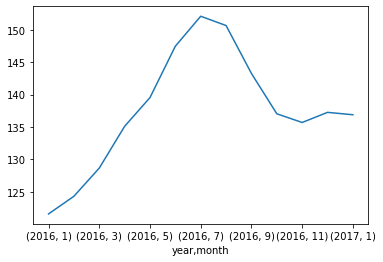

In [43]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
avg_price = calendar.groupby(['year','month'])['price'].mean().plot(kind='line')
#avg_price = calendar.groupby(['year','month'])['price'].median().plot(kind='line')
avg_price

From this it appears that prices are the highest during the summer, especially around July

In [53]:
# look at the average prices for each neighborhood

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

<AxesSubplot:xlabel='neighbourhood_cleansed'>

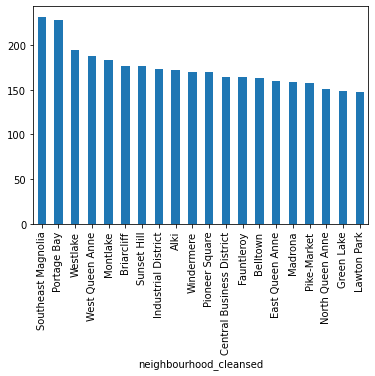

In [72]:
#Display the top 20 most expensive neighbor hoods by average price

top_summary = listings.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False)
top_summary.head(20).plot(kind='bar')

In [75]:
top_summary.head(20)

neighbourhood_cleansed
Southeast Magnolia           231.705882
Portage Bay                  227.857143
Westlake                     194.470588
West Queen Anne              187.769231
Montlake                     182.789474
Briarcliff                   176.571429
Sunset Hill                  176.055556
Industrial District          173.333333
Alki                         171.619048
Windermere                   169.900000
Pioneer Square               169.260870
Central Business District    164.213592
Fauntleroy                   164.100000
Belltown                     162.893162
East Queen Anne              159.414634
Madrona                      158.234043
Pike-Market                  157.785714
North Queen Anne             150.240741
Green Lake                   149.018519
Lawton Park                  147.566667
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_cleansed'>

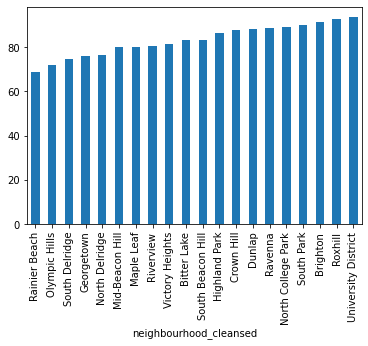

In [73]:
#Display the bottom 20 least expensive neighbor hoods by average price

bottom_summary = listings.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)
bottom_summary.head(20).plot(kind='bar')

In [76]:
bottom_summary.head(20)

neighbourhood_cleansed
Rainier Beach          68.555556
Olympic Hills          71.687500
South Delridge         74.666667
Georgetown             76.125000
North Delridge         76.375000
Mid-Beacon Hill        79.933333
Maple Leaf             80.261905
Riverview              80.500000
Victory Heights        81.466667
Bitter Lake            83.000000
South Beacon Hill      83.250000
Highland Park          86.272727
Crown Hill             87.666667
Dunlap                 88.300000
Ravenna                88.686567
North College Park     89.105263
South Park             90.000000
Brighton               91.230769
Roxhill                92.500000
University District    93.639344
Name: price, dtype: float64

The most expensive neighbourhood is Southewast Magnolia with an average price of 231.70
The least expensive neighbourhood is Ranier Beach with an average price of 68.55

#### Clean

In [78]:
#Filter out columns which would not appear important to airbnb home price

#Get column name list
listings.columns.values.tolist()

#remove id, listing_url, scrape_id, last_scraped, name, summary

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [83]:
listings['jurisdiction_names'].value_counts()

WASHINGTON    3818
Name: jurisdiction_names, dtype: int64

In [84]:
listings['smart_location'].value_counts()

Seattle, WA                  3810
West Seattle, WA                2
Seattle , WA                    2
西雅图, WA                         1
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
seattle, wa                     1
Name: smart_location, dtype: int64

In [85]:
listings['calendar_updated'].value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
11 months ago      5
12 months ago      5
22 months ago      2
13 months ago      2
14 months ago      1
16 months ago      1
17 months ago      1
30 months ago      1
15 months ago      1
Name: calendar_updated, dtype: int64

In [86]:
listings['requires_license'].value_counts()

f    3818
Name: requires_license, dtype: int64

In [104]:
listings['host_listings_count'].equals(listings['host_total_listings_count'])

True

In [312]:
#drop colums that are text based or redundant (e.g, neighbourhood and zipcode).
#Use neighbourhood_group_cleansed as main location variable
#Use Price as the response variable, remove weekly_price and monthly_price
#Remove host_listings_count since it is identical to host_total_listings_count. ALso remove calculated_host_listings_count 
#Remove Security Deposit and Cleaning Fee since both are implicitly in price
#Use annual availability only (availability_365)

droplist = ['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'license',
 'jurisdiction_names',
 'calculated_host_listings_count',
  'amenities',
 'extra_people',
 'host_verifications']

listings_clean = listings.drop(columns = droplist)

In [313]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                3295 non-null   object 
 1   host_response_rate                3295 non-null   object 
 2   host_acceptance_rate              3045 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   host_total_listings_count         3816 non-null   float64
 5   host_has_profile_pic              3816 non-null   object 
 6   host_identity_verified            3816 non-null   object 
 7   neighbourhood_group_cleansed      3818 non-null   object 
 8   property_type                     3817 non-null   object 
 9   room_type                         3818 non-null   object 
 10  accommodates                      3818 non-null   int64  
 11  bathrooms                         3802 non-null   float64
 12  bedroo

In [314]:
#Check for any missing data in each column

listings_clean.isna().sum()

host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_total_listings_count              2
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_group_cleansed           0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
square_feet                         3721
price                                  0
guests_included                        0
availability_365                       0
number_of_reviews                      0
review_scores_rating                 647
review_scores_accuracy               658
review_scores_cleanliness            653
review_scores_checkin                658
review_scores_co

In [315]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                3295 non-null   object 
 1   host_response_rate                3295 non-null   object 
 2   host_acceptance_rate              3045 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   host_total_listings_count         3816 non-null   float64
 5   host_has_profile_pic              3816 non-null   object 
 6   host_identity_verified            3816 non-null   object 
 7   neighbourhood_group_cleansed      3818 non-null   object 
 8   property_type                     3817 non-null   object 
 9   room_type                         3818 non-null   object 
 10  accommodates                      3818 non-null   int64  
 11  bathrooms                         3802 non-null   float64
 12  bedroo

In [316]:
#Remove square_feet since virtually all rows do not contain values
listings_clean2 = listings_clean.drop(['square_feet'], axis = 1)
#I will impute missing values of host_response_time, host_response_rate, host_acceptance_rate with the median value as distribution are skewed
#I will use median to impute missing values of review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, reviews_per_month since their distributions are also skewed
               
impute_list = ['review_scores_rating',
               'review_scores_accuracy',
               'review_scores_cleanliness',
               'review_scores_checkin',  
               'review_scores_communication',
               'review_scores_location',
               'review_scores_value',
               'reviews_per_month']


for name in impute_list:
    listings_clean2[name] = listings_clean2[name].fillna(listings_clean2[name].median())

In [317]:
#Fill in missing values with most common category
listings_clean2['host_response_time'] = listings_clean2['host_response_time'].fillna(listings_clean2['host_response_time'].value_counts().index[0])
listings_clean2['host_response_rate'] = listings_clean2['host_response_rate'].fillna(listings_clean2['host_response_rate'].value_counts().index[0])
listings_clean2['host_acceptance_rate'] = listings_clean2['host_acceptance_rate'].fillna(listings_clean2['host_acceptance_rate'].value_counts().index[0])

In [318]:
listings_clean2.isna().sum()

host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    2
host_total_listings_count            2
host_has_profile_pic                 2
host_identity_verified               2
neighbourhood_group_cleansed         0
property_type                        1
room_type                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
bed_type                             0
price                                0
guests_included                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location               0
review_scores_value      

In [319]:
listings_clean2['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [320]:
#Assign the low count variables below 20 into 'Other'

listings_clean2['property_type']= listings_clean2['property_type'].replace("Chalet", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Yurt", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Dorm", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Treehouse", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Tent", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Boat", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Camper/RV", "Other")
listings_clean2['property_type']= listings_clean2['property_type'].replace("Bungalow", "Other")

In [321]:
listings_clean2['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [322]:
listings_clean2['property_type'] = listings_clean2['property_type'].replace("Interbay", "Other neighborhoods")

In [323]:
# For the remaining rows with missing data, I don't want to simply fill the missing data with 0's as that is unlikely to be a true reflection on the property. FOr example, it is unlikely an Airbnb home would have 0 bathrooms.
# Therefore, it is best to remove the rows since it is a very small subset of the total dataset

listings_cleaned = listings_clean2.dropna()
listings_cleaned['host_response_rate'] = listings_cleaned['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings_cleaned['host_acceptance_rate'] = listings_cleaned['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
listings_cleaned.describe()

<ipython-input-323-ff6f9f2bb9d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned['host_response_rate'] = listings_cleaned['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
<ipython-input-323-ff6f9f2bb9d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned['host_acceptance_rate'] = listings_cleaned['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000
mean,95.598998,99.973636,7.090693,3.351173,1.260084,1.308463,1.737147,128.018191,1.675191,244.485895,22.132876,94.794885,9.698392,9.632481,9.824413,9.843659,9.676509,9.547324,1.995178
std,11.149127,1.623710,28.564453,1.980937,0.590934,0.884867,1.141255,90.434794,1.313858,126.853482,37.569868,6.046245,0.650981,0.743764,0.545179,0.514630,0.591358,0.713004,1.679116
min,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,100.000000,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,124.000000,2.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.840000
50%,100.000000,100.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,1.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,100.000000,100.000000,3.000000,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,360.000000,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.670000
max,100.000000,100.000000,502.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,15.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


#### Model

In [324]:
#One hot encoding

catlist = listings_cleaned.select_dtypes(include=['object']).columns
catlist

listings_cleaned_ohc = pd.get_dummies(listings_cleaned, columns=catlist)
listings_cleaned_ohc.head(10)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,availability_365,...,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,2,346,...,1,1,0,0,1,0,1,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,1,291,...,1,1,0,0,0,1,0,1,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,10,220,...,1,1,0,0,0,1,1,0,1,0
3,100.0,100.0,1.0,3,1.0,0.0,2.0,100.0,1,143,...,1,1,0,1,0,0,1,0,1,0
4,100.0,100.0,2.0,6,2.0,3.0,3.0,450.0,6,365,...,1,1,0,0,0,1,1,0,1,0
5,100.0,100.0,1.0,2,1.0,1.0,1.0,120.0,1,302,...,1,1,0,0,0,1,1,0,1,0
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,1,346,...,1,1,0,0,1,0,1,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,1,100,...,1,1,0,0,0,1,0,1,0,1
8,100.0,100.0,1.0,2,1.0,1.0,1.0,90.0,1,341,...,1,1,0,0,0,1,1,0,1,0
9,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,1,324,...,1,1,0,0,0,1,0,1,0,1


In [325]:
#Create train and test data sets

X = listings_cleaned_ohc.drop(columns = ['price'])
y = listings_cleaned_ohc['price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [326]:
#Build Model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
#model = Ridge(alpha=0.5)   
model.fit(X_train, y_train) 
     
# Predict the model and get the score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) 
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test,y_test_pred)

print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.5804718482338136.  The rsquared score on the test data was 0.6117479394458303.


In [327]:
summary_coef = pd.DataFrame()
summary_coef['Predictor'] = X_train.columns
summary_coef['coefficient'] = model.coef_
summary_coef['abs_coefficient'] = abs(model.coef_)
summary_coef.sort_values(by = ["abs_coefficient"], ascending = False)

,Predictor,coefficient,abs_coefficient
34,neighbourhood_group_cleansed_Downtown,37.163904,37.163904
31,neighbourhood_group_cleansed_Cascade,35.704000,35.704000
53,room_type_Entire home/apt,34.669983,34.669983
55,room_type_Shared room,-33.742341,33.742341
38,neighbourhood_group_cleansed_Northgate,-31.080356,31.080356
...,...,...,...
62,instant_bookable_t,-0.070362,0.070362
61,instant_bookable_f,0.070362,0.070362
9,number_of_reviews,-0.058088,0.058088
8,availability_365,0.038362,0.038362


Based on the table, the biggest factors would be whether the home is located in Downtown, Cascade, or Northgate and whether the airbnb rental is an entire home/apt or shared room. The shared room is particularly interesting because it is highly unusual a shared room would cause an airbnb rental price to be higher. This will need to be further investigated as this is a very rudimentary first model attempt at the data.

### Evaluation

In conclusion, the highest prices for Airbnbs occur during the summer months, especially in July. The most expensive neighbourhood is Southeast Magnolia with an average night price of 231.70. The least expensive neighbourhood is Ranier Beach with an average night price of 68.55. The location of the home is a big influencer on the price, with those Downtown and in Cascade tending to lead to higher prices. Importantly, renting entire homes or apartments are a big contributor to higher Airbnb prices which makes sense since the whole place is being rented for accomomdation.
